In [186]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os

import struct
import mrcfile
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io
import time
from skimage import measure
from skimage import filters

# Linearity Test
This script analysis series taken with no sample on the sensor, standard settings for 4DSTEM (1025px, bin2, 1100FPS) was used, different combinations of CL and SS were used to generate different dose/px/frame on the sensor. Dose/px/frame will change proportional to camera length and spot size.
Make a plot of mean intensity vs dose/px/frame.

In [144]:
int_list[-1]

3991.2232923923248

In [169]:
path = '/srv/home/chenyu/DEbackup/060219/LinearityTest/'
filelist = glob.glob(path + '*.seq')
CL_list = []
SS_list = []
int_list = []
for i in range(len(filelist)):
    fileName = filelist[i]
    temp = fileName.split('/')[-1]
    CL = int(temp.split('_')[0][2:])
    SS = int(temp.split('_')[1][2:-4])
    CL_list.append(CL)
    SS_list.append(SS)
    darkrefFile = filelist[i] + '.dark.mrc'
    gainrefFile = filelist[i] + '.gain.mrc'
    darkref = loadMRCfile(darkrefFile)
    gainref = loadMRCfile(gainrefFile)
    numframes, true_imagesize = loadHeader(fileName,darkref)
    frame_accumulated = saveFile(fileName,  darkref, gainref, 100, true_imagesize)
    if CL<= 130:
        # case for high dose where beam cannot fill the whole frame
        mask = np.heaviside(frame_accumulated-700,1)
        int_list.append(np.sum(frame_accumulated*mask)/np.sum(mask))
        print('Mask applied')
    else:
        int_list.append(np.mean(frame_accumulated))
    print('Camera length '+ str(CL) + ' Spot Size ' + str(SS) + ': mean int ' + str(int_list[-1]))

Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL300_SS7.seq
Camera length 300 Spot Size 7: mean int 1918.8135039531178
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL1200_SS9.seq
Camera length 1200 Spot Size 9: mean int 21.620863820993563
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL480_SS7.seq
Camera length 480 Spot Size 7: mean int 676.2446763587479
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL940_SS7.seq
Camera length 940 Spot Size 7: mean int 165.3932242331694
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL46_SS10.seq
Mask applied
Camera length 46 Spot Size 10: mean int 10178.332843398994
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL300_SS6.seq
Camera length 300 Spot Size 6: mean int 3991.2232923923248
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL480_SS6.seq
Camera length 480 Spot Size 6: mean int 1363.8650976295387
Reading file /srv/home/chenyu/DEbackup/060219/LinearityT

Camera length 195 Spot Size 10: mean int 566.2865960423379
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL100_SS6.seq
Mask applied
Camera length 100 Spot Size 6: mean int 34345.572202109346
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL770_SS6.seq
Camera length 770 Spot Size 6: mean int 543.5813927492617
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL77_SS8.seq
Mask applied
Camera length 77 Spot Size 8: mean int 14208.64450573601
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL160_SS9.seq
Camera length 160 Spot Size 9: mean int 1548.301978827002
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL380_SS7.seq
Camera length 380 Spot Size 7: mean int 1160.8367348447055
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL380_SS9.seq
Camera length 380 Spot Size 9: mean int 284.7436725507654
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL245_SS8.seq
Camera length 245 Spot Size 8: mean int 1344.9940

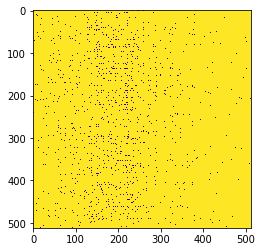

In [154]:
plt.imshow(mask)

In [183]:
fileName = '/srv/home/chenyu/DEbackup/060219/LinearityTest/CL1200_SS10.seq'
temp = fileName.split('/')[-1]
CL = int(temp.split('_')[0][2:])
SS = int(temp.split('_')[1][2:-4])
print('Camera length '+ str(CL) + ' Spot Size ' + str(SS))
darkrefFile = fileName + '.dark.mrc'
gainrefFile = fileName + '.gain.mrc'
darkref = loadMRCfile(darkrefFile)
gainref = loadMRCfile(gainrefFile)
numframes, true_imagesize = loadHeader(fileName,darkref)
frame_accumulated = saveFile(fileName,  darkref, gainref, 1, true_imagesize)

Camera length 1200 Spot Size 10
Reading file /srv/home/chenyu/DEbackup/060219/LinearityTest/CL1200_SS10.seq


In [188]:
frame = frame_accumulated
frame_binary = np.heaviside(frame-10,1)
all_labels = measure.label(frame_binary)
ncomponents = np.amax(all_labels)
print(ncomponents)

826


6244.812515927975
14208.64450573601
True


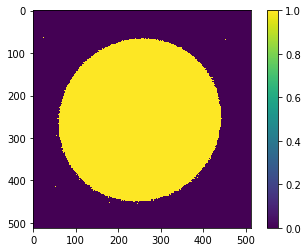

In [168]:
mask = np.heaviside(frame_accumulated-700,1)
plt.imshow(mask)
plt.colorbar()
print(np.mean(frame_accumulated))
print(np.sum(frame_accumulated*mask)/np.sum(mask))
print(CL<=130)

In [85]:
print(np.asarray(int_list)/100)

[1.91881350e+01 2.16208638e-01 6.76244676e+00 1.65393224e+00
 1.78899226e+01 3.99122329e+01 1.36386510e+01 2.62197468e+00
 4.98515370e+00 1.06261520e+00 3.74895553e-01 9.28414567e-01
 6.33271267e+01 8.43563326e-01 1.21353057e-01 4.73594953e+01
 1.13148676e-01 3.49273723e+00 5.69765249e-01 5.75500318e+01
 8.75551110e+01 1.65936136e+01 1.31658388e+01 1.34897790e+02
 3.24480909e+01 1.08720418e+00 9.14341513e+00 2.39375718e+01
 2.22841496e+00 2.09980511e+02 6.48853311e-01 6.84816240e+00
 5.79278513e+00 3.36606664e+00 1.38227205e+00 9.66677745e+00
 1.63956414e+00 1.73996718e+01 2.76976362e+02 4.75919709e-01
 9.82123205e+01 2.03622728e+01 2.98157481e+01 3.08713020e+01
 1.05321670e+01 2.38475489e+01 2.73939946e+01 3.36601502e+01
 1.63312919e+01 1.24868152e+02 1.95024855e+00 3.60316822e-01
 2.64628279e+00 8.45154557e+00 4.47295956e+00 3.75762093e+00
 3.06544795e+01 4.15201927e+01 5.97317173e+01 1.31386516e+02
 5.66286596e+00 2.67062640e+02 5.43581393e+00 6.24481252e+01
 1.54830198e+01 1.160836

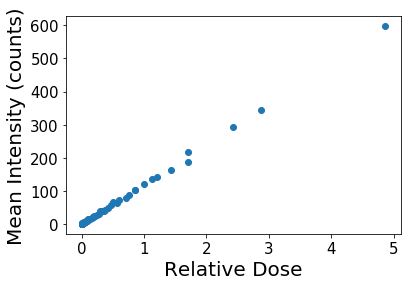

In [182]:
CL_list = np.asarray(CL_list).astype(float)
SS_list = np.asarray(SS_list).astype(float)
Dose_list = 60*60/CL_list/CL_list * 2 ** (9-SS_list)
plt.scatter(Dose_list,np.asarray(int_list)/100)
# plt.yscale('log')
# plt.xlim([0,0.05])
# plt.ylim([0,6])
plt.xlabel('Relative Dose',fontsize=20)
plt.ylabel('Mean Intensity (counts)', fontsize=20)
plt.tick_params(labelsize=15)

In [3]:
def loadMRCfile(filepath):
    with open(filepath, mode='rb') as file: # b is important -> binary
        file.seek(0)
        read_bytes = file.read(8)
        frame_width = struct.unpack('<i',read_bytes[0:4])
        frame_width = frame_width[0]
        frame_height = struct.unpack('<i',read_bytes[4:8])
        frame_height = frame_height[0]
        image = np.zeros((frame_height,frame_width))
        file.seek(256*4)
        dataset = file.read(frame_width*frame_height*4)
        for irow in range(frame_height):
            for icol in range(frame_width):
                pixel = struct.unpack('<f',dataset[(irow*frame_width+icol)*4:(irow*frame_width+icol+1)*4])[0]
                image[irow,icol] = pixel
        return image

In [43]:
def loadHeader(fileName,darkref):
    print('Reading file ' + fileName)
    with open(fileName, mode='rb') as file: # b is important -> binary
        file.seek(548)
        read_bytes = file.read(20)
        frame_width = struct.unpack('<L',read_bytes[0:4])
        frame_height = struct.unpack('<L',read_bytes[4:8])
        bit_depth = struct.unpack('<L',read_bytes[8:12])
        bit_depth_real = struct.unpack('<L',read_bytes[12:16])
        frame_bytesize = struct.unpack('<L',read_bytes[16:20])
#         print('Each frame is ' + str(frame_width[0]) + ' by ' + str(frame_height[0]) + ' px.')

        file.seek(572)
        read_bytes = file.read(4)
        num_frames = struct.unpack('<i',read_bytes)
#         print('Total ' + str(num_frames[0]) + ' frames collected.')

        file.seek(584)
        read_bytes = file.read(8)
        frame_rate = struct.unpack('<d',read_bytes)
#         print('Image acquired at ' + str(frame_rate[0]) + ' frames per second.')

        file.seek(580)
        read_bytes = file.read(4)
        true_imagesize = struct.unpack('<L',read_bytes[0:4])

        if frame_width[0] != darkref.shape[0] or frame_height[0] != darkref.shape[1]:
            print('Norpix frame size (' + str(frame_height[0]) + ',' +str(frame_width[0]) +  ') disagree with reference size' + str(darkref.shape))
            
        return num_frames[0],true_imagesize[0]

In [20]:
def saveFile(fileName, darkref, gainref, numframes, true_imagesize):
    with open(fileName, mode='rb') as file:
        frame_accumulated = np.zeros((darkref.shape[0],darkref.shape[1]))
        for iframe in range(numframes):
            file.seek(8192 + iframe * true_imagesize)
            read_bytes = file.read(darkref.shape[0] * darkref.shape[1] * 2)
            frame_raw = np.zeros((darkref.shape[0],darkref.shape[1]))
            frame = np.zeros((darkref.shape[0],darkref.shape[1]))
            for irow in range(darkref.shape[0]):
                for icol in range(darkref.shape[1]):
                    pixel = struct.unpack('<h',read_bytes[(irow*darkref.shape[1]+icol)*2:(irow*darkref.shape[1]+icol+1)*2])[0]
                    frame_raw[irow,icol] = pixel
            frame = (frame_raw - darkref)*gainref
            frame_accumulated = frame_accumulated + frame
    return frame_accumulated